In [ ]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%ls drive/MyDrive/


'08_10_20 Assignment 123018046.pdf'
'123018046 (1).pdf'
'123018046 (2).pdf'
 123018046_DSA_Assignment.pdf
 123018046_OS.pdf
 123018046.pdf
 123018046.zip
'2019 June.pdf'
'28-12 SE lab.gdoc'
'29 Aug Quiz 123018046.pdf'
 aEDA-dataset.csv
 aEDA-dataset.gsheet
'Assigment20_10_20_Class diagram - 123018046.pdf'
'Assignment 1 - 123018046.pdf'
'Assignment 1 - 123018046 - SE.pdf'
'Assignment 1.pdf'
'Assignment 29-10-20.docx'
'Assignment 29-10-20.pdf'
'Assignment 4.pdf'
'Assignment 5 - 123018046 (1).docx'
'Assignment 5 - 123018046 (2).docx'
'Assignment 5 - 123018046.docx'
'Basic Input Output.pdf'
'BCG Matrix - My Topic.gdoc'
'Buisness Strategy - Project Workboard.gdoc'
'Business Strategy Assignment.gdoc'
 Classroom/
 cloud-classification/
 cloud-classification.zip
'code 123018046.pdf'
'Colab Notebooks'/
'Copy of Interview Prep DSA.gdoc'
'Copy of MAKE A COPY OF THE DOC - Harvard CV Template.doc'
'Copy of Metamorphosis Business Plan by Slidesgo.gslides'
'Copy of OutputFormat-1.cpp'
'Copy of Unit 1

In [ ]:
dfo = pd.read_csv("drive/MyDrive/orig_dataset.csv")
dfo

,id,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,...,H,L,LL,control_mode,control_scheme,pump,crc_rate,measurement,time,result
0,1,7,7,183,233,9,10,3,10,3,...,80,20,10,2,1,0,1,14.894827,1.13,0
1,2,7,7,183,233,9,10,3,10,3,...,80,20,10,2,1,0,1,16.259237,1.25,0
2,3,7,7,183,233,9,10,3,10,3,...,80,20,10,2,1,0,1,17.254122,1.04,0
3,4,7,7,183,233,9,10,3,10,3,...,80,20,10,2,1,0,1,17.936329,1.07,0
4,5,7,7,183,233,9,10,3,10,3,...,80,20,10,2,1,0,1,18.703810,1.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236174,236175,7,7,183,233,10,10,3,10,3,...,80,20,10,2,1,0,0,89.198410,1.30,0
236175,236176,7,7,183,233,10,10,3,10,3,...,80,20,10,2,1,0,0,89.567932,1.20,0
236176,236177,7,7,183,233,10,10,3,10,3,...,80,20,10,2,1,0,0,88.317230,1.05,0
236177,236178,7,7,183,233,10,10,3,10,3,...,80,20,10,2,1,0,0,88.374077,1.07,0


In [ ]:
sns.pairplot(df)

In [ ]:
df.drop(['id'], axis=1, inplace=True)
df

In [ ]:
ndf = (df-df.mean())/df.std()
ndf['result'] = (df['result']-df['result'].min())/(df['result'].max()-df['result'].min())
ndf

In [ ]:
ndf.assign(command_memory=0)
ndf

In [ ]:
ndf.write_csv("norm_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls /content/drive/MyDrive

'08_10_20 Assignment 123018046.pdf'
'123018046 (1).pdf'
'123018046 (2).pdf'
 123018046_DSA_Assignment.pdf
 123018046_OS.pdf
 123018046.pdf
 123018046.zip
'2019 June.pdf'
'28-12 SE lab.gdoc'
'29 Aug Quiz 123018046.pdf'
 aEDA-dataset.csv
 aEDA-dataset.gsheet
'Assigment20_10_20_Class diagram - 123018046.pdf'
'Assignment 1 - 123018046.pdf'
'Assignment 1 - 123018046 - SE.pdf'
'Assignment 1.pdf'
'Assignment 29-10-20.docx'
'Assignment 29-10-20.pdf'
'Assignment 4.pdf'
'Assignment 5 - 123018046 (1).docx'
'Assignment 5 - 123018046 (2).docx'
'Assignment 5 - 123018046.docx'
'Basic Input Output.pdf'
'BCG Matrix - My Topic.gdoc'
'Buisness Strategy - Project Workboard.gdoc'
'Business Strategy Assignment.gdoc'
 Classroom/
 cloud-classification/
 cloud-classification.zip
'code 123018046.pdf'
'Colab Notebooks'/
'Copy of Interview Prep DSA.gdoc'
'Copy of MAKE A COPY OF THE DOC - Harvard CV Template.doc'
'Copy of Metamorphosis Business Plan by Slidesgo.gslides'
'Copy of OutputFormat-1.cpp'
'Copy of Unit 1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/norm_dataset.csv")
#df = pd.read_csv("norm_dataset.csv")
df['command_memory'] = 0

In [ ]:
df = df.iloc[: , 1:]
df[0]

KeyError: ignored

In [ ]:
df['comm_read_function'] = 0
df['resp_read_fun'] = 0
df['control_scheme'] = 0
df['command_length'] = 0

In [ ]:
df

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,H,L,LL,control_mode,control_scheme,pump,crc_rate,measurement,time,result
0,0.061224,1.0,0,1.0,0.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,1.0,0.475336,0.433333,0.0
1,0.061224,1.0,0,1.0,0.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,1.0,0.475336,0.833333,0.0
2,0.061224,1.0,0,1.0,0.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,1.0,0.475336,0.133333,0.0
3,0.061224,1.0,0,1.0,0.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,1.0,0.475336,0.233333,0.0
4,0.061224,1.0,0,1.0,0.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,1.0,0.475336,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236174,0.061224,1.0,0,1.0,1.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,0.0,0.475336,1.000000,0.0
236175,0.061224,1.0,0,1.0,1.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,0.0,0.475336,0.666667,0.0
236176,0.061224,1.0,0,1.0,1.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,0.0,0.475336,0.166667,0.0
236177,0.061224,1.0,0,1.0,1.0,1.0,0,0.0,0,1.0,...,0.33195,0.07874,0.039216,1.0,0,0.0,0.0,0.475336,0.233333,0.0


In [ ]:
result = dfo['result']
df = df.drop(['result'],axis=1)
result = result.to_numpy()

Y = []
for i in result:
  classes = [0] * 8
  classes[i] = 1
  Y.append(classes)


In [ ]:
dataset = df.to_numpy()
dataset

array([[0.06122449, 1.        , 0.        , ..., 1.        , 0.47533632,
        0.43333333],
       [0.06122449, 1.        , 0.        , ..., 1.        , 0.47533632,
        0.83333333],
       [0.06122449, 1.        , 0.        , ..., 1.        , 0.47533632,
        0.13333333],
       ...,
       [0.06122449, 1.        , 0.        , ..., 0.        , 0.47533632,
        0.16666667],
       [0.06122449, 1.        , 0.        , ..., 0.        , 0.47533632,
        0.23333333],
       [0.06122449, 1.        , 0.        , ..., 0.        , 0.47533632,
        0.16666667]])

In [ ]:
dataset.shape

(236179, 23)

In [ ]:
Y = np.fromfile("dataset_Y.dat", dtype=int)

FileNotFoundError: ignored

In [ ]:
#Y = np.array(list([0, 1] if i else [1, 0] for i in np.random.randint(0, 2, size=(236179,))))


In [ ]:
# [1, 0] => True
# [0, 1] => False
# 0 index = True, 1 index = False
Y, Y.shape

In [ ]:
fnn_model = Sequential()
fnn_model.add(Dense(12, input_shape=(None, 24), activation='relu'))
fnn_model.add(Dense(8, activation='relu'))
fnn_model.add(Dense(8, activation='sigmoid'))
fnn_model.summary()

NameError: ignored

In [ ]:
fnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: ignored

In [ ]:
X = dataset

In [ ]:
history = fnn_model.fit(X, Y, epochs=2, batch_size=100)
# evaluate the keras model
_, accuracy = fnn_model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

NameError: ignored

In [ ]:
X.shape

In [ ]:
X = X.reshape(-1, 23, 1)

In [ ]:
X.shape

(236179, 23, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(24, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))
model.summary()

In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'] ,
)

In [ ]:
history = model.fit(X, Y, epochs=4, verbose=1, batch_size=100)

In [ ]:
sns.lineplot(history)

NameError: ignored

In [ ]:
import random
predict_X = X[:100]
test_Y = model.predict(predict_X)
[not np.argmax(i) for i in test_Y]

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape=(23, 1))
print(inputs.shape)
lstm_1 = LSTM(50, activation='relu', return_sequences=True)(inputs)
lstm_2 = LSTM(50, activation='relu')(lstm_1)
lstm_output = Dense(8)(lstm_2)
print(lstm_output.shape)

lstm_model = keras.Model(inputs=inputs, outputs=lstm_output, name="LSTM-model")

(None, 23, 1)
(None, 8)


In [ ]:

fnn_dense_1 = Dense(12, activation='relu')(inputs)
fnn_flatten = keras.layers.Flatten()(fnn_dense_1)
fnn_dense_2 = Dense(8, activation='relu')(fnn_flatten)
fnn_output = Dense(8, activation='sigmoid')(fnn_dense_2)
print(fnn_output.shape)

fnn_model = keras.Model(inputs=inputs, outputs=fnn_output, name="FNN-model")

(None, 8)


In [ ]:
model_outputs = [lstm_model(inputs), fnn_model(inputs)]

concat_inputs = keras.layers.Concatenate(axis=1)(model_outputs)


fnn_dense_1 = Dense(12, input_shape=(-1, 4), activation='relu')(concat_inputs)
fnn_dense_2 = Dense(8, activation='relu', use_bias=True)(fnn_dense_1)
fnn_output = Dense(8, activation='sigmoid', use_bias=True)(fnn_dense_2)

NameError: ignored

In [ ]:
model = keras.Model(inputs=inputs, outputs=fnn_output, name="FNN-model")

In [ ]:
lstm_model.summary()
model.summary()

NameError: ignored

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'] ,
)

NameError: ignored

In [ ]:
x = X.reshape(-1, 23, 1)

NameError: ignored

In [ ]:
history = model.fit(np.asarray(x), np.asarray(Y), epochs=4, verbose=1, batch_size=100)

Epoch 1/4
2362/2362 [==============================] - 88s 36ms/step - loss: 0.4806 - accuracy: 0.8660
Epoch 2/4
2362/2362 [==============================] - 86s 36ms/step - loss: 0.3477 - accuracy: 0.8995
Epoch 3/4
2362/2362 [==============================] - 83s 35ms/step - loss: 0.3314 - accuracy: 0.9038
Epoch 4/4
2362/2362 [==============================] - 82s 35ms/step - loss: 0.3280 - accuracy: 0.9041


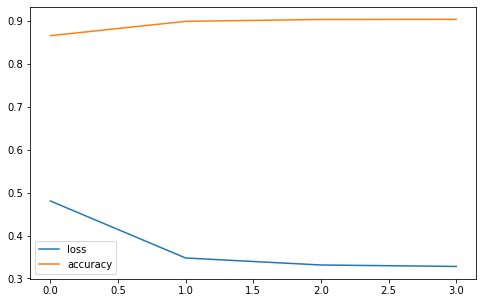

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
tdf = pd.read_csv("10_water_final.csv")
tdf.drop(['id'], axis=1, inplace=True)

tdf = (tdf-tdf.mean())/tdf.std()
tdf['result'] = (tdf['result']-tdf['result'].min())/(tdf['result'].max()-tdf['result'].min())
tdf['command_memory'] = 0
tdf['comm_read_function'] = 0
tdf['resp_read_fun'] = 0
tdf['control_scheme'] = 0
tdf['command_length'] = 0
tdf = tdf.iloc[: , 1:]

Tresult = tfo['result']
X_test = tdf.drop(['result'],axis=1)
Tresult = Tresult.to_numpy()

Y_test = []
for i in Tresult:
  classes = [0] * 8
  classes[i] = 1
  Y_test.append(classes)

NameError: ignored

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))

NameError: ignored